In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
path = r"https://raw.githubusercontent.com/mic00s/Summer-School-2023/%D1%87%D0%B5%D1%80%D0%BD%D0%BE%D0%B2%D0%B0/raw%20data/raw_data.date%20formatting.training.csv"
df=pd.read_csv(filepath_or_buffer=path)

df.head()


,course_id,sched_1_355,sched_2_1035,sched_3_418,sched_4_2543,stop_1_355,stop_2_1035,stop_3_418,stop_4_2543,stay_1_355,stay_2_1035,stay_3_418,stay_4_2543,daily_course,weekly_course,df1,df2,df3
0,1143527,2020-01-10-05-30,2020-01-10-05-31,2020-01-10-05-33,2020-01-10-05-35,2020-01-10-05-29,2020-01-10-05-30,2020-01-10-05-31,2020-01-10-05-34,0.0,0.0,1.0,1.0,1,1,0.000694,0.000694,0.002083
1,1143529,2020-01-10-06-42,2020-01-10-06-43,2020-01-10-06-45,2020-01-10-06-47,2020-01-10-06-41,2020-01-10-06-43,2020-01-10-06-44,2020-01-10-06-48,1.0,1.0,0.0,1.0,2,2,0.001389,0.000694,0.002778
2,1143531,2020-01-10-07-44,2020-01-10-07-46,2020-01-10-07-48,2020-01-10-07-51,2020-01-10-07-45,2020-01-10-07-47,2020-01-10-07-49,2020-01-10-07-52,1.0,1.0,2.0,1.0,3,3,0.001389,0.001389,0.002083
3,1143533,2020-01-10-08-58,2020-01-10-09-00,2020-01-10-09-02,2020-01-10-09-05,2020-01-10-08-58,2020-01-10-09-00,2020-01-10-09-01,2020-01-10-09-04,0.0,0.0,0.5,1.0,4,4,0.001389,0.000694,0.002083
4,1143535,2020-01-10-10-28,2020-01-10-10-30,2020-01-10-10-32,2020-01-10-10-35,2020-01-10-10-27,2020-01-10-10-30,2020-01-10-10-31,2020-01-10-10-34,2.0,1.0,0.0,0.0,5,5,0.002083,0.000694,0.002083


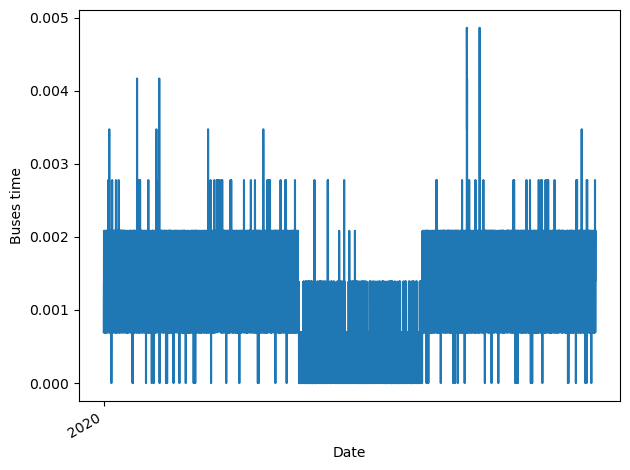

In [17]:
##trend over time

fig, ax = plt.subplots()

ax.plot(df['df1'])
#ax.plot(df['daily_course'])
ax.set_xlabel('Date')
ax.set_ylabel('Buses time')

plt.xticks(np.arange(0, 13, 16), np.arange(2020, 2021, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#create data time and set index for panel data (plot datetime features as features )
#df['date'] = pd.to_datetime(df['sched_1_355','sched_2_1035', 'sched_3_418', 
 #  'sched_4_2543', 'stop_1_355', 'stop_2_1035', 
  # 'stop_3_418', 'stop_4_2543'])


auto_arima_data['Month'] = pd.to_datetime(auto_arima_data['Month'])
auto_arima_data.set_index('Month',inplace=True)
auto_arima_data.head()

#convert the date variables into value/numerical



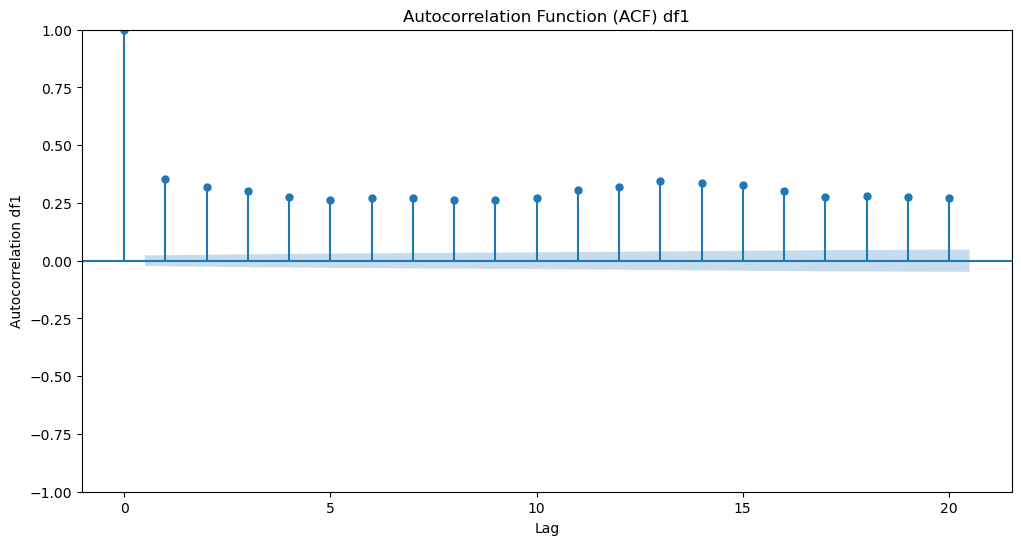

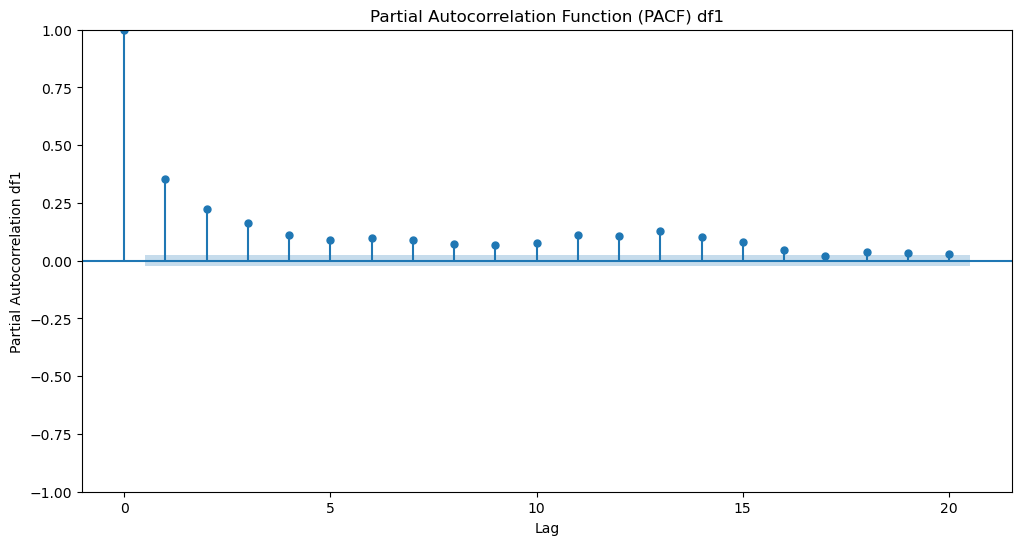

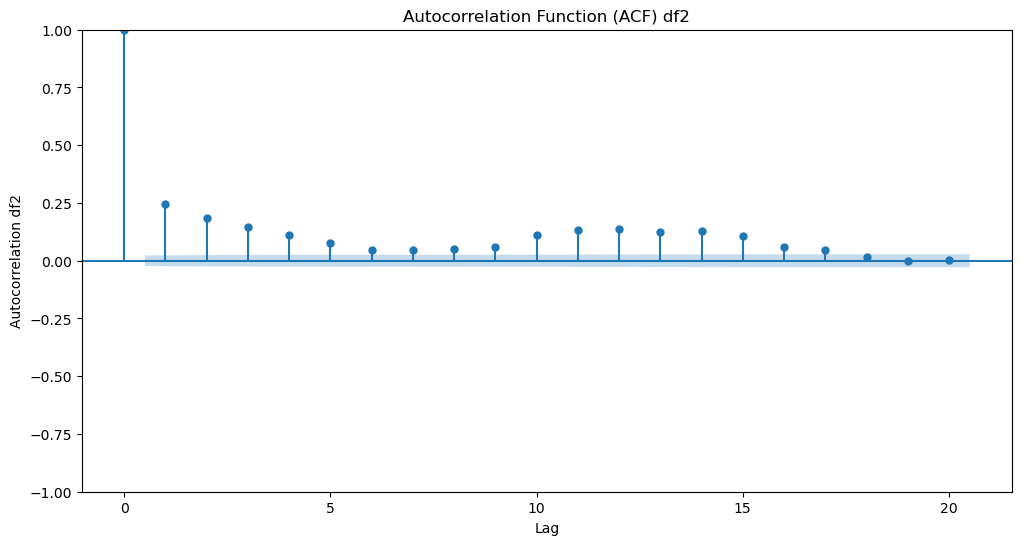

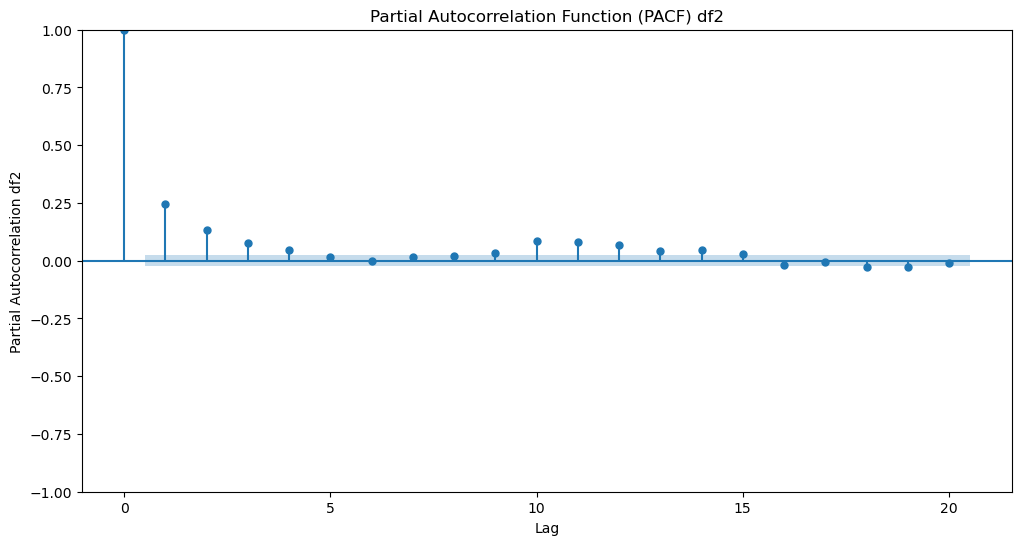

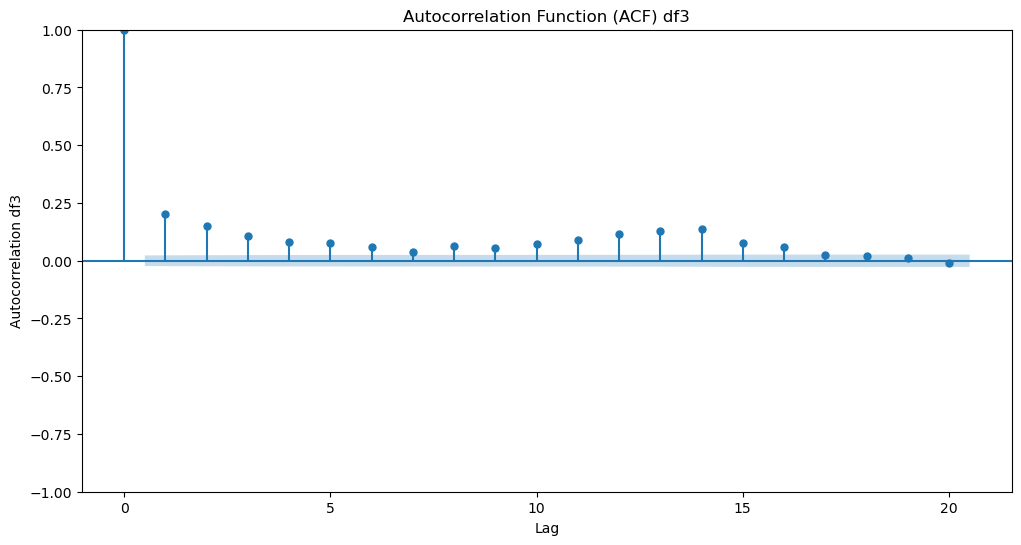

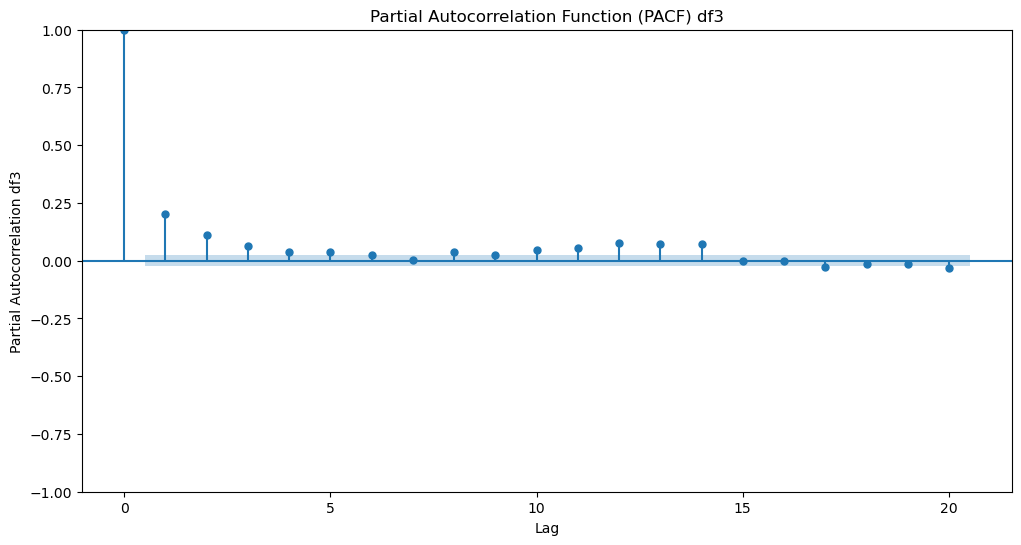

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ACF and PACF plots

# Plot the ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df ['df1'], lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation df1')
plt.title('Autocorrelation Function (ACF) df1')
plt.show()

# Plot the PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df ['df1'], lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation df1')
plt.title('Partial Autocorrelation Function (PACF) df1')
plt.show()

#ACF and PACF plots

# Plot the ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df ['df2'], lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation df2')
plt.title('Autocorrelation Function (ACF) df2')
plt.show()

# Plot the PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df ['df2'], lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation df2')
plt.title('Partial Autocorrelation Function (PACF) df2')
plt.show()

#ACF and PACF plots

# Plot the ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df ['df3'], lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation df3')
plt.title('Autocorrelation Function (ACF) df3')
plt.show()

# Plot the PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df ['df3'], lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation df3')
plt.title('Partial Autocorrelation Function (PACF) df3')
plt.show()


In [ ]:

#line plot to understand the pattern
auto_arima_data.plot()


In [ ]:
target = df[''] # difference stop2 - stop 1/ deltas
exog = df[['df1', 'df2', 'df3', 'daily_course', 'weekly_course']]

In [ ]:
# test  for stationarity

ad_fuller_result = adfuller(target)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

##stationary_test = ADFTest(alpha= 0.05)
##stationary_test.should_diff(auto_arima_data)


In [ ]:
#stationarity

target_diff = target.diff()

ad_fuller_result = adfuller(target_diff[1:])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

In [ ]:
#Sarimax function

def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df



In [ ]:
target_train = target[:200]
exog_train = exog[:200]

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 0
Q = range(0, 4, 1)
s = 4

parameters = product(p, q, P, Q)
parameters_list = list(parameters)


In [ ]:
result_df = optimize_SARIMAX(target_train, exog_train, parameters_list, d, D, s)
result_df

In [ ]:
best_model = SARIMAX(target_train, exog_train, order=(2,1,2), seasonal_order=(1,0,0,4), simple_differencing=False)
best_model_fit = best_model.fit(disp=False)

print(best_model_fit.summary())

In [ ]:


best_model_fit.plot_diagnostics(figsize=(10,8));



In [ ]:
residuals = best_model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

In [ ]:
def recursive_forecast(endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(2,1,2), seasonal_order=(1,0,0,4), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
            
        return pred_SARIMAX

In [ ]:
target_train = target[:196]
target_test = target[196:]

pred_df = pd.DataFrame({'actual': target_test})

TRAIN_LEN = len(target_train)
HORIZON = len(target_test)
WINDOW = 1

pred_last_value = recursive_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_SARIMAX = recursive_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df['pred_last_value'] = pred_last_value
pred_df['pred_SARIMAX'] = pred_SARIMAX

pred_df

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_last = mape(pred_df.actual, pred_df.pred_last_value)
mape_SARIMAX = mape(pred_df.actual, pred_df.pred_SARIMAX)

print(mape_last, mape_SARIMAX)

In [ ]:
fig, ax = plt.subplots()

x = ['naive last value', 'SARIMAX']
y = [mape_last, mape_SARIMAX]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 1)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')

plt.tight_layout()